# July 03 - MixMaxScaling

In [1]:
# Python library and module imports
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import math
import h5py
import torch

# Add the path to the parent directory to augment search for module
par_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if par_dir not in sys.path:
    sys.path.append(par_dir)
    
# Import the custom plotting module
from plot_utils import plot_utils

# WatChMaL imports
from io_utils.data_handling import WCH5Dataset

In [10]:
dset=WCH5Dataset("/fast_scratch/WatChMaL/data/IWCDmPMT/varyE/IWCDmPMT_varyE_100-1000MeV_300k_fmt.h5",
                 0.1,
                 0.1,
                 shuffle=True,
                 reduced_dataset_size=50)

In [11]:
event_data = []
for i in range(len(dset)):
    data = next(iter(dset))
    event_data.append(data[0])
    
np_event_data = np.array(event_data)
print("Printing event data shape : ", np_event_data.shape)

Printing event data shape :  (50, 16, 40, 38)


In [12]:
np_charge_data = np_event_data[:,:,:,:19]
np_timing_data = np_event_data[:,:,:,19:]

print("Printing event charge data shape : ", np_charge_data.shape)
print("Printing event timing data shape : ", np_timing_data.shape)

Printing event charge data shape :  (50, 16, 40, 19)
Printing event timing data shape :  (50, 16, 40, 19)


## 1a. Flatten the numpy arrays

In [13]:
# Flatten the numpy arrays
np_charge_data = np_charge_data.reshape(-1,1)
np_timing_data = np_timing_data.reshape(-1,1)

In [14]:
# Remove the zeros from the charge and timing
np_charge_data = np_charge_data[np_charge_data > 0].reshape(-1,1)
np_timing_data = np_timing_data[np_timing_data > 0].reshape(-1,1)

## 1b. Visualize the distribution

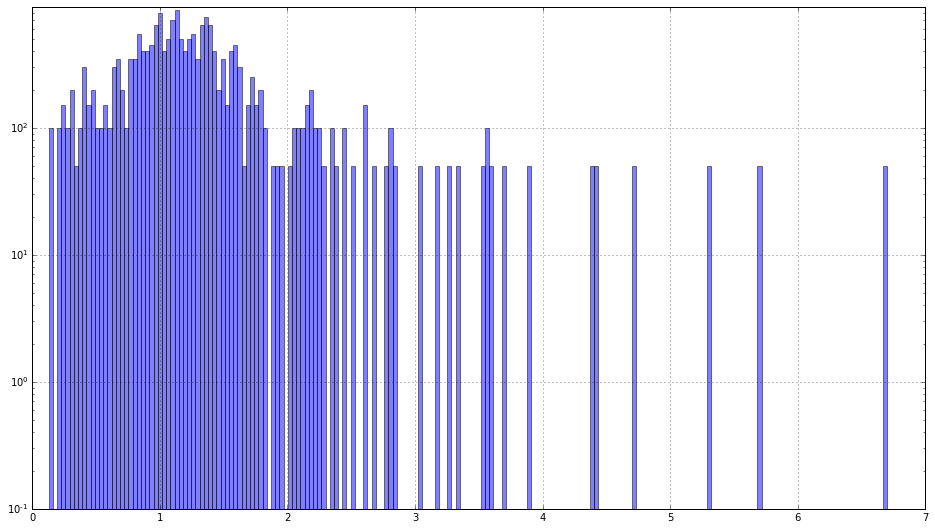

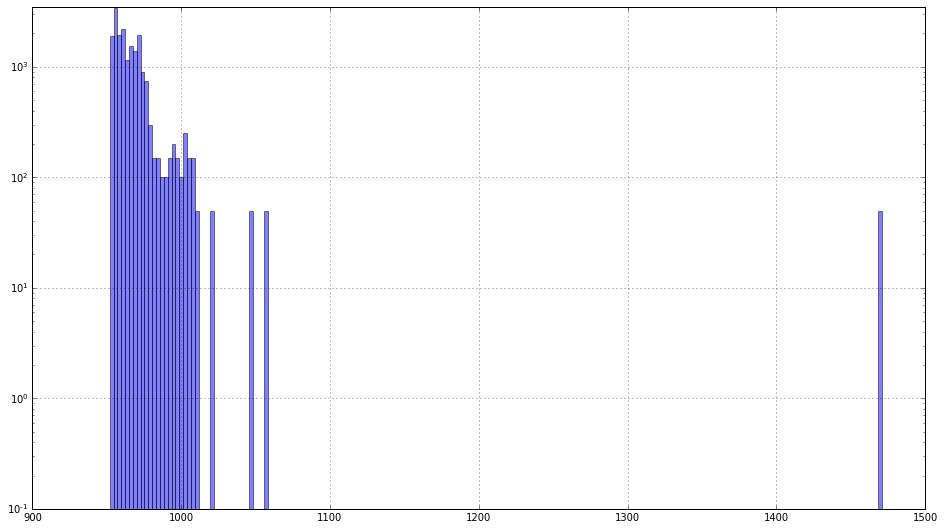

In [15]:
# Plot the charge distribution
fig = plt.figure(figsize=(16,9))
plt.hist(np_charge_data, bins=200, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.yscale('log')

# Plot the timing distribution
fig = plt.figure(figsize=(16,9))
plt.hist(np_timing_data, bins=200, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.yscale('log')

## 2. Applying StandardScaling

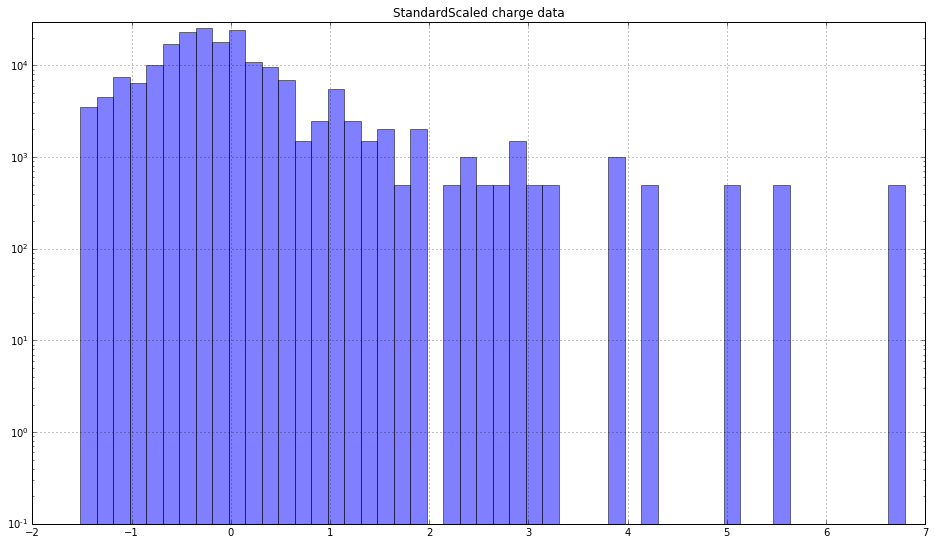

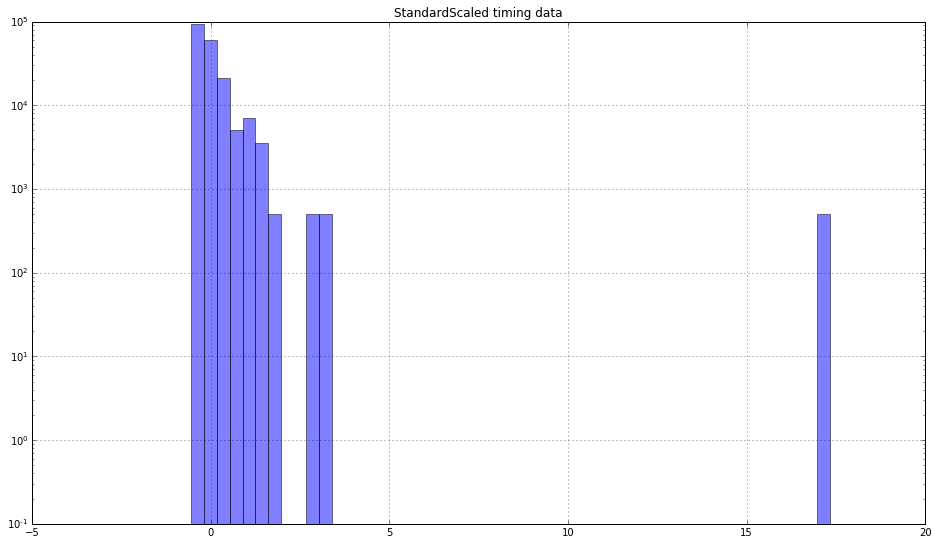

In [68]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()

#  Fit only the charge data
std_charge_data = stdscaler.fit_transform(np_charge_data)

# Plot the charge distribution
fig = plt.figure(figsize=(16,9))
plt.hist(std_charge_data, bins=50, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.title("StandardScaled charge data")
plt.yscale('log')

# Fit only the timing data
std_timing_data = stdscaler.fit_transform(np_timing_data)

# Plot the timing distribution
fig = plt.figure(figsize=(16,9))
plt.hist(std_timing_data, bins=50, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.title("StandardScaled timing data")
plt.yscale('log')

## 3. Applying MinMaxScaling

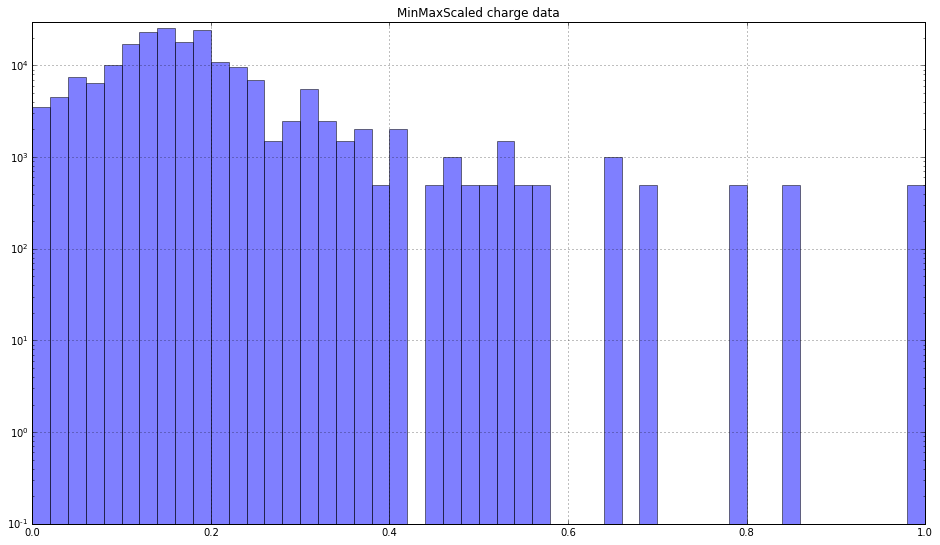

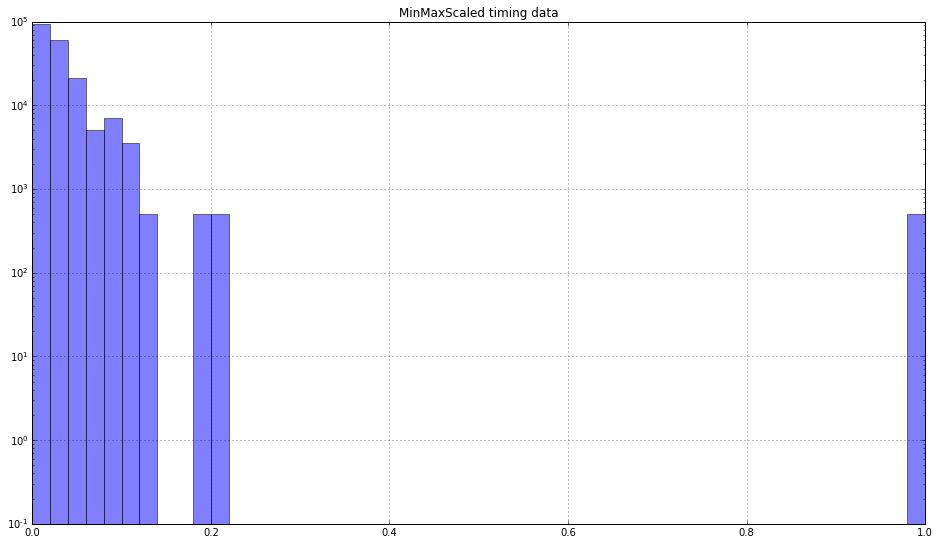

In [69]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()

#  Fit only the charge data
minmaxscaler.fit(np_charge_data)
minmax_charge_data = minmaxscaler.transform(np_charge_data)

# Plot the charge distribution
fig = plt.figure(figsize=(16,9))
plt.hist(minmax_charge_data, bins=50, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.title("MinMaxScaled charge data")
plt.yscale('log')

# Fit only the timing data
minmaxscaler.fit(np_timing_data)
minmax_timing_data = minmaxscaler.transform(np_timing_data)

# Plot the timing distribution
fig = plt.figure(figsize=(16,9))
plt.hist(minmax_timing_data, bins=50, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.title("MinMaxScaled timing data")
plt.yscale('log')

## 3. Applying RobustScaling

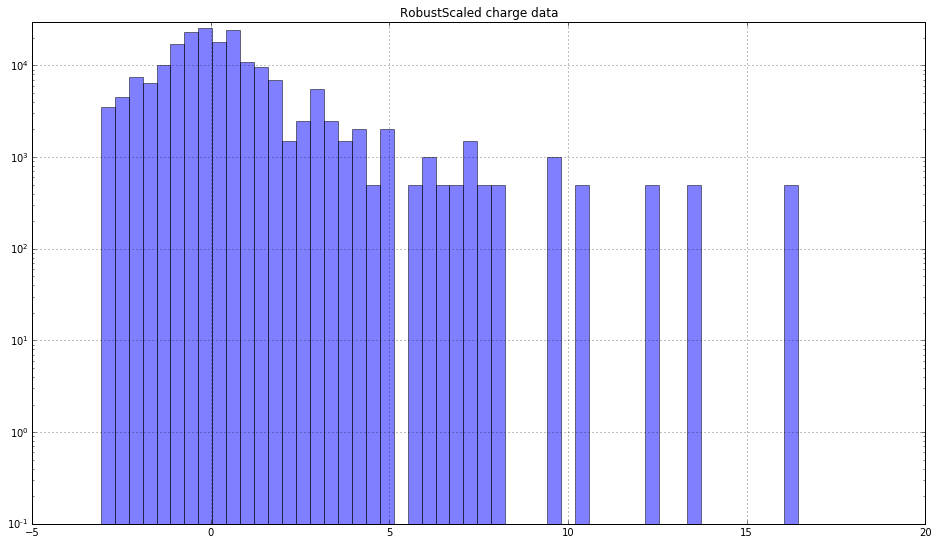

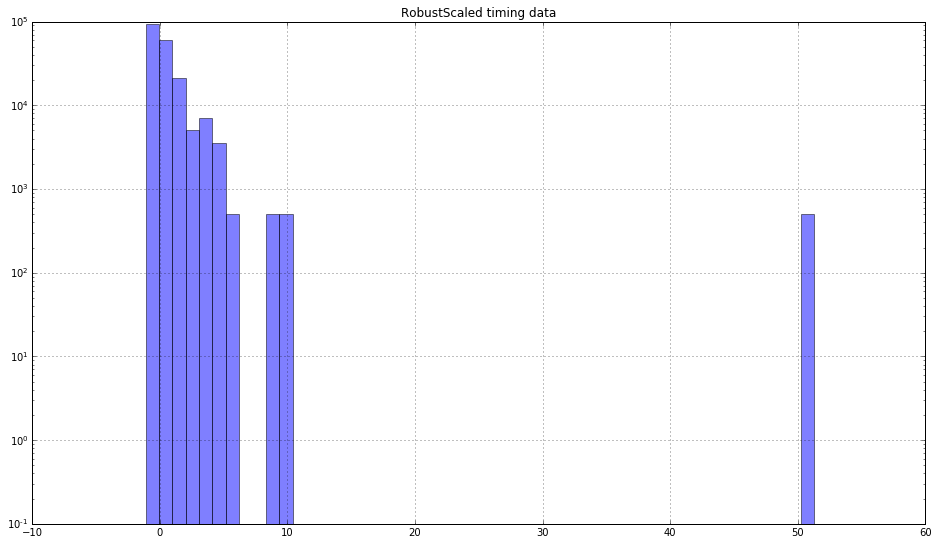

In [70]:
from sklearn.preprocessing import RobustScaler

rbsscaler = RobustScaler(quantile_range=(35.0, 65.0))

#  Fit only the charge data
rbs_charge_data = rbsscaler.fit_transform(np_charge_data)

# Plot the charge distribution
fig = plt.figure(figsize=(16,9))
plt.hist(rbs_charge_data, bins=50, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.title("RobustScaled charge data")
plt.yscale('log')

# Fit only the timing data
rbs_timing_data = rbsscaler.fit_transform(np_timing_data)

# Plot the timing distribution
fig = plt.figure(figsize=(16,9))
plt.hist(rbs_timing_data, bins=50, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.title("RobustScaled timing data")
plt.yscale('log')

## 4. Applying PowerTransform ( using Yeo-Johnson method )

/opt/conda/lib/python3.6/site-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


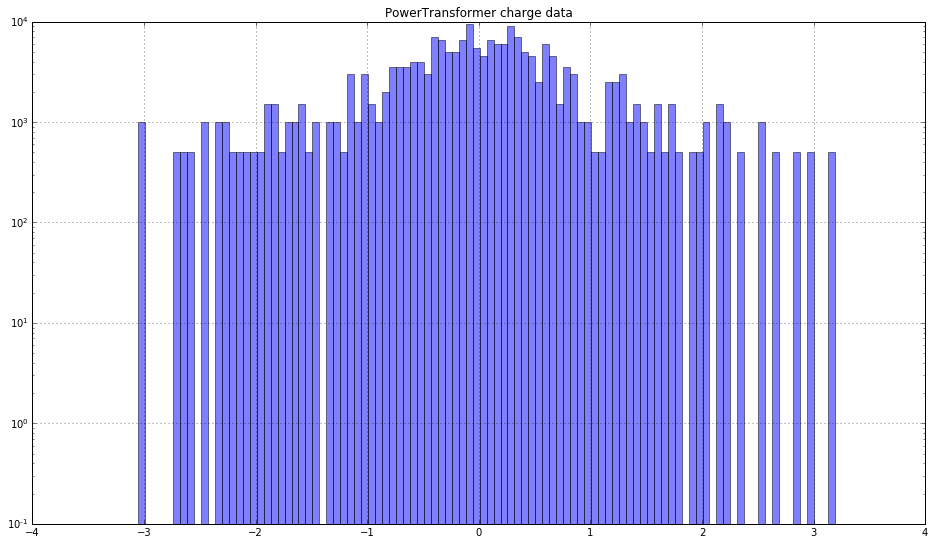

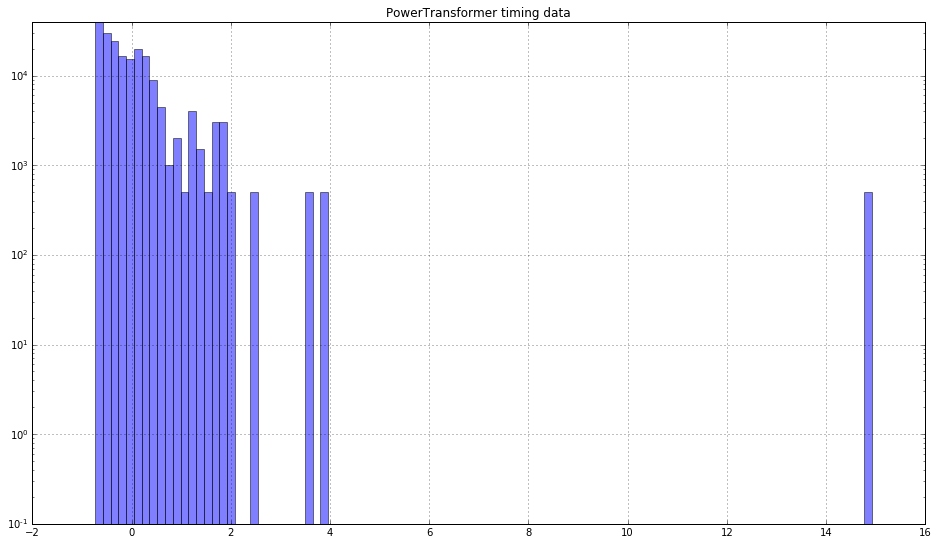

In [77]:
from sklearn.preprocessing import PowerTransformer

pwrscaler = PowerTransformer()

#  Fit only the charge data
pwr_charge_data = pwrscaler.fit_transform(np_charge_data)

# Plot the charge distribution
fig = plt.figure(figsize=(16,9))
plt.hist(pwr_charge_data, bins=100, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.title("PowerTransformer charge data")
plt.yscale('log')

# Fit only the timing data
pwr_timing_data = pwrscaler.fit_transform(np_timing_data)

# Plot the timing distribution
fig = plt.figure(figsize=(16,9))
plt.hist(pwr_timing_data, bins=100, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.title("PowerTransformer timing data")
plt.yscale('log')

## 5. Applying PowerTransform (using Box-Cox method)

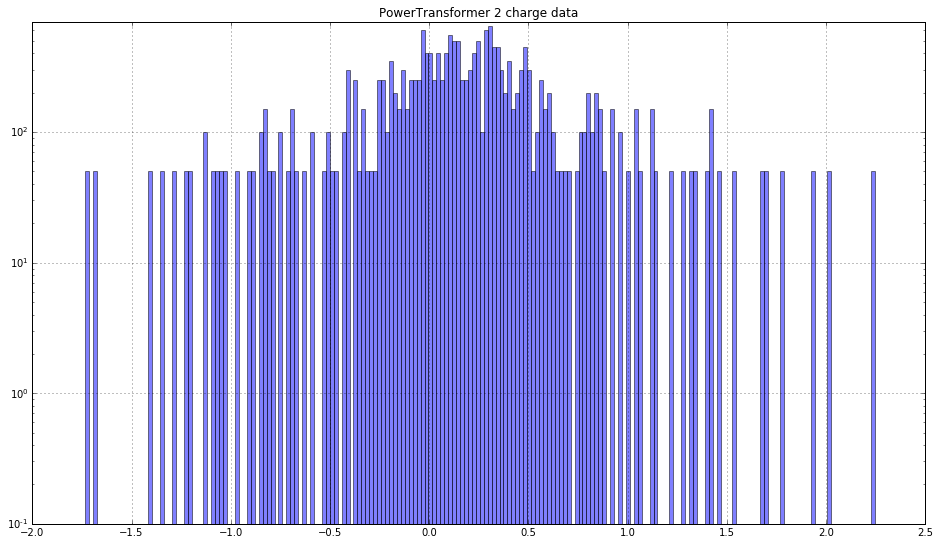

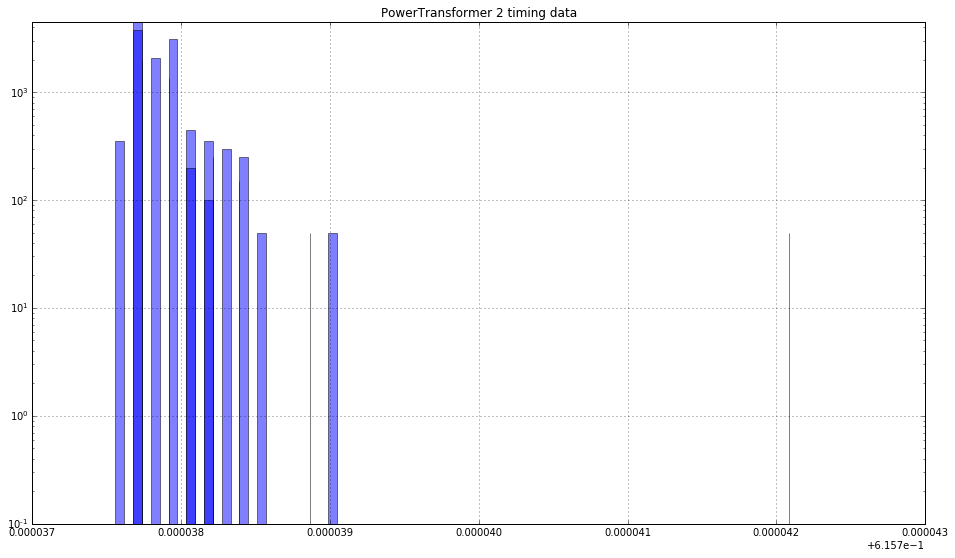

In [19]:
from sklearn.preprocessing import PowerTransformer

pwrscaler = PowerTransformer(method="box-cox", standardize=False)

#  Fit only the charge data
pwr_charge_data = pwrscaler.fit_transform(np_charge_data)

# Plot the charge distribution
fig = plt.figure(figsize=(16,9))
plt.hist(pwr_charge_data, bins=200, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.title("PowerTransformer 2 charge data")
plt.yscale('log')

# Fit only the timing data
pwr_timing_data = pwrscaler.fit_transform(np_timing_data)

# Plot the timing distribution
fig = plt.figure(figsize=(16,9))
plt.hist(pwr_timing_data, bins=200, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.title("PowerTransformer 2 timing data")
plt.yscale('log')

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


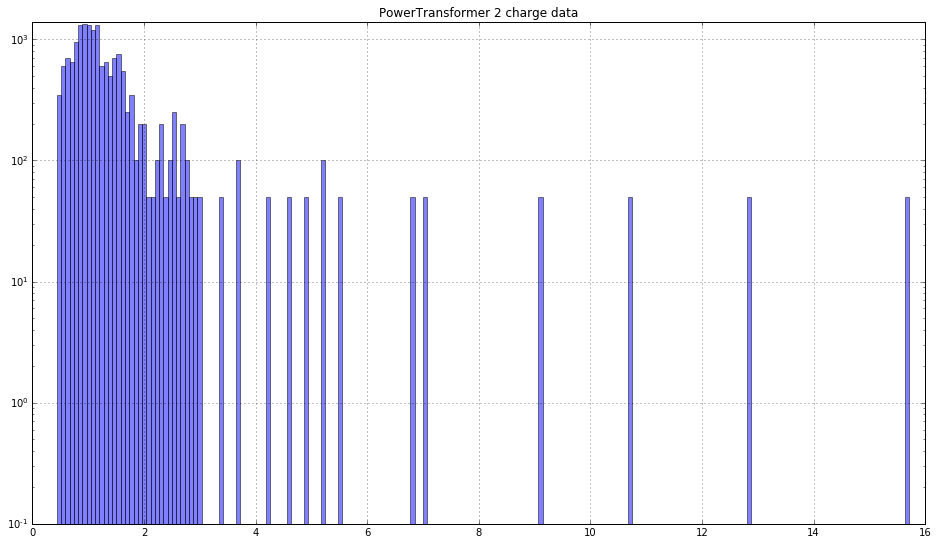

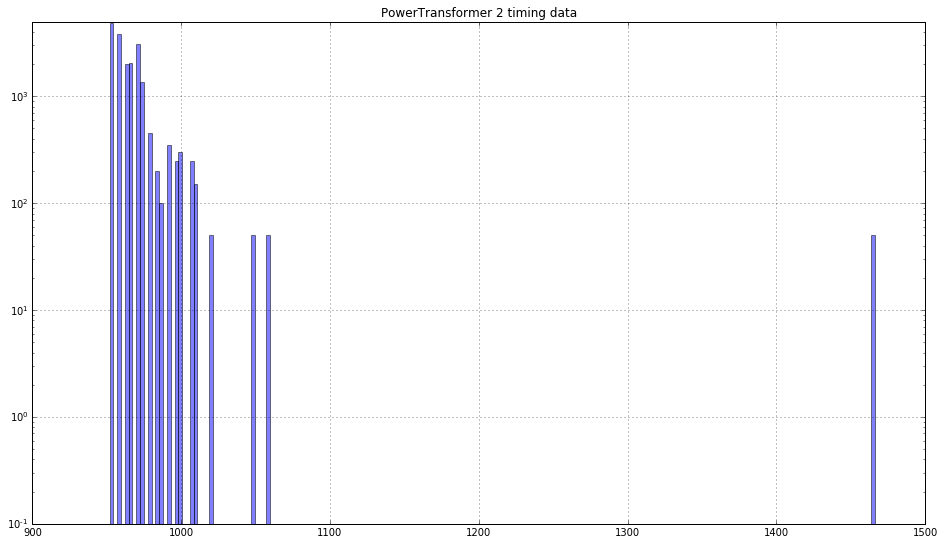

In [20]:
#  Fit only the charge data
pwr_charge_data = pwrscaler.inverse_transform(pwr_charge_data)

# Plot the charge distribution
fig = plt.figure(figsize=(16,9))
plt.hist(pwr_charge_data, bins=200, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.title("PowerTransformer 2 charge data")
plt.yscale('log')

# Fit only the timing data
pwr_timing_data = pwrscaler.inverse_transform(pwr_timing_data)

# Plot the timing distribution
fig = plt.figure(figsize=(16,9))
plt.hist(pwr_timing_data, bins=200, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.title("PowerTransformer 2 timing data")
plt.yscale('log')

## 6. Applying Quantile Transformer ( output distribution = uniform )

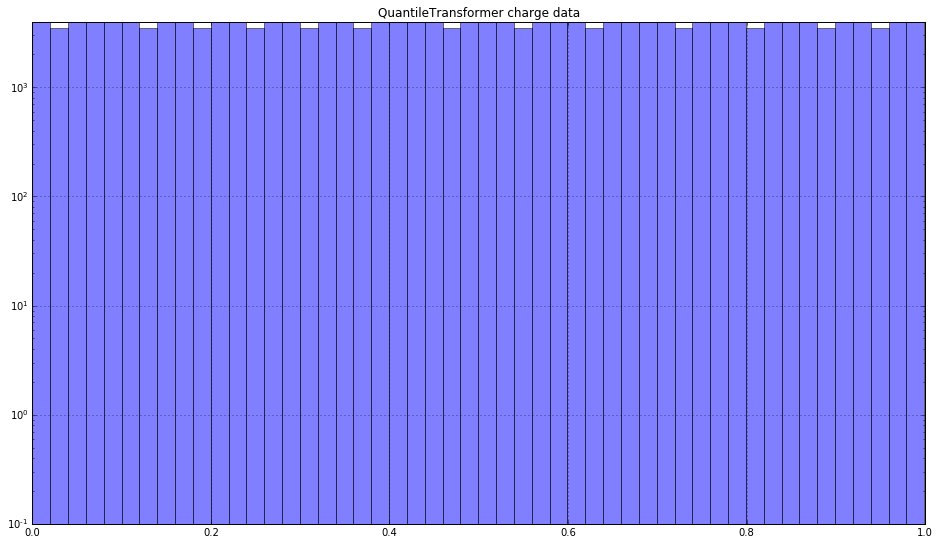

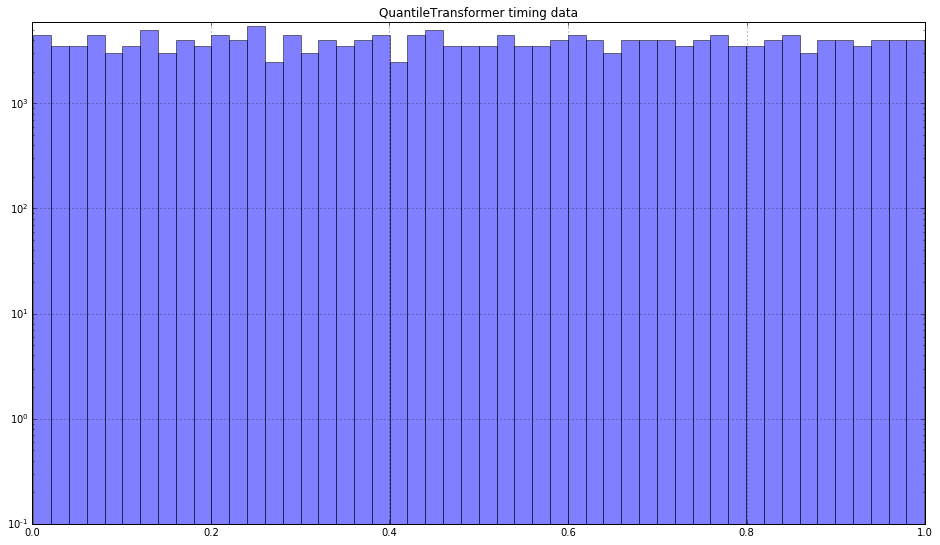

In [73]:
from sklearn.preprocessing import QuantileTransformer

qtlscaler = QuantileTransformer()

#  Fit only the charge data
qtl_charge_data = qtlscaler.fit_transform(np_charge_data)

# Plot the charge distribution
fig = plt.figure(figsize=(16,9))
plt.hist(qtl_charge_data, bins=50, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.title("QuantileTransformer charge data")
plt.yscale('log')

# Fit only the timing data
qtl_timing_data = qtlscaler.fit_transform(np_timing_data)

# Plot the timing distribution
fig = plt.figure(figsize=(16,9))
plt.hist(qtl_timing_data, bins=50, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.title("QuantileTransformer timing data")
plt.yscale('log')

## 7. Applying Quantile Transformer (output distribution = normal)

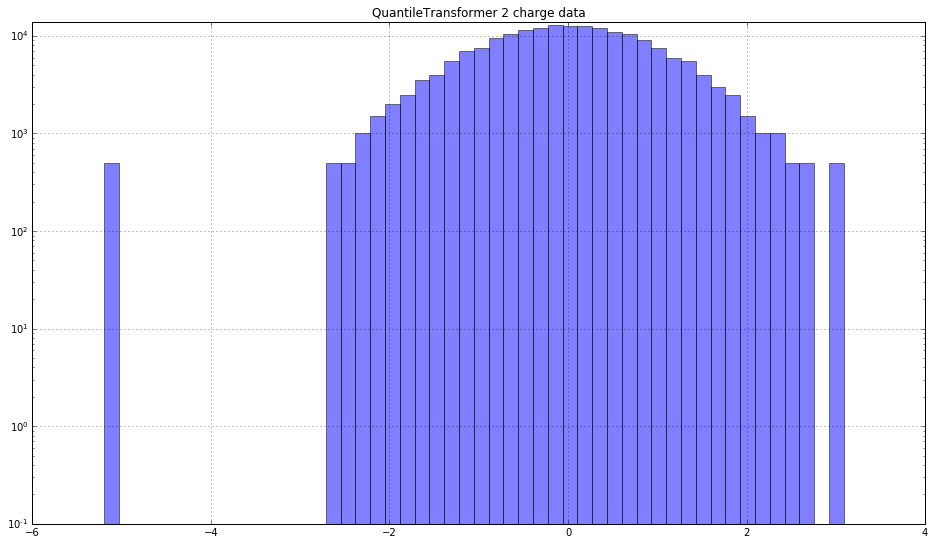

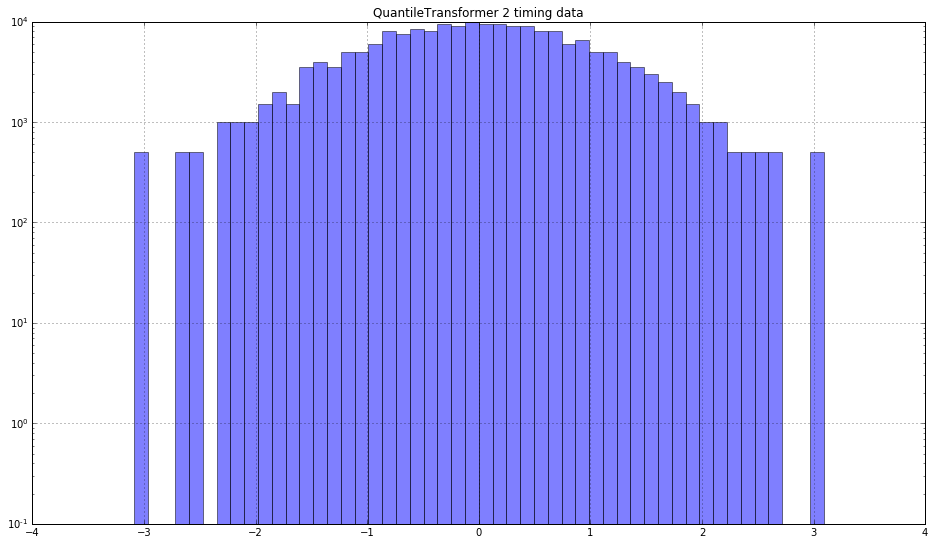

In [74]:
from sklearn.preprocessing import QuantileTransformer

qtlscaler = QuantileTransformer(output_distribution="normal")

#  Fit only the charge data
qtl_charge_data = qtlscaler.fit_transform(np_charge_data)

# Plot the charge distribution
fig = plt.figure(figsize=(16,9))
plt.hist(qtl_charge_data, bins=50, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.title("QuantileTransformer 2 charge data")
plt.yscale('log')

# Fit only the timing data
qtl_timing_data = qtlscaler.fit_transform(np_timing_data)

# Plot the timing distribution
fig = plt.figure(figsize=(16,9))
plt.hist(qtl_timing_data, bins=50, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.title("QuantileTransformer 2 timing data")
plt.yscale('log')

## 8. Applying Normalizer

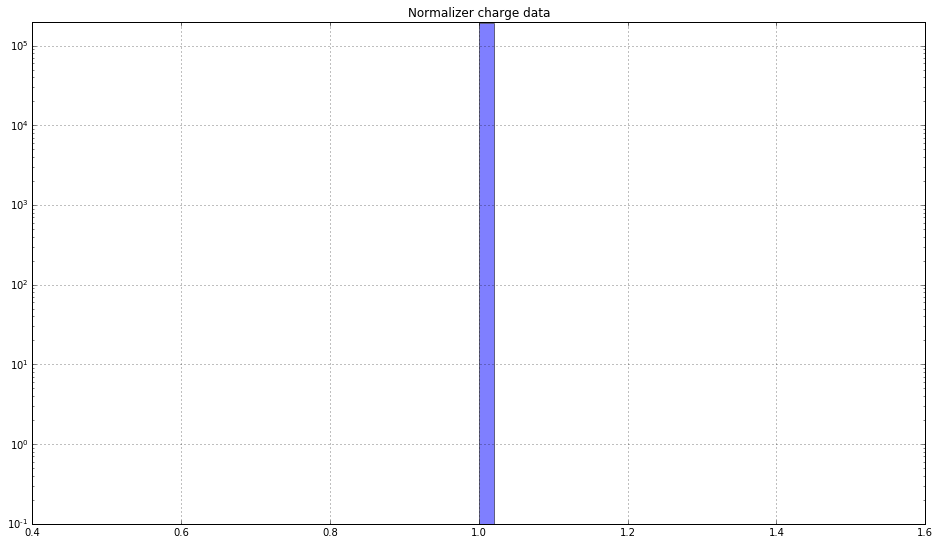

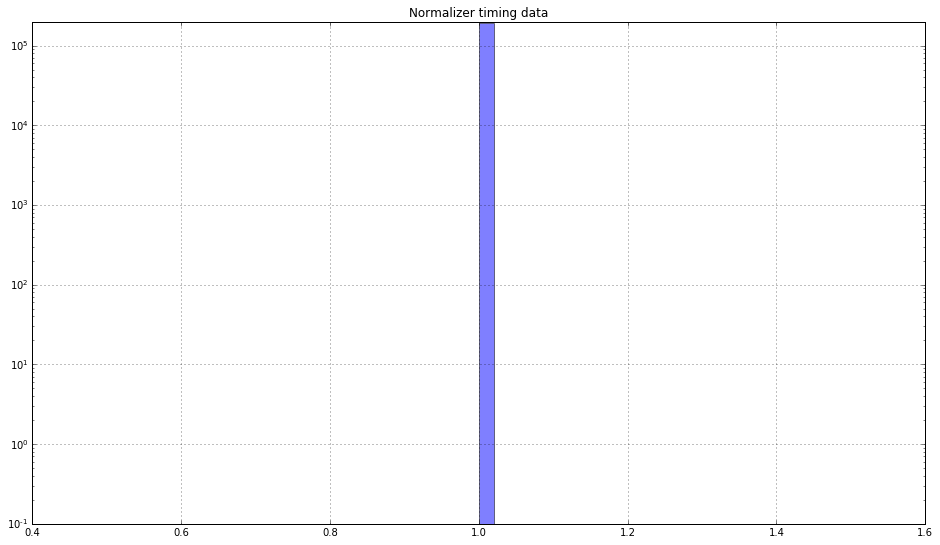

In [75]:
from sklearn.preprocessing import Normalizer

nmlscaler = Normalizer()

#  Fit only the charge data
nml_charge_data = nmlscaler.fit_transform(np_charge_data)

# Plot the charge distribution
fig = plt.figure(figsize=(16,9))
plt.hist(nml_charge_data, bins=50, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.title("Normalizer charge data")
plt.yscale('log')

# Fit only the timing data
nml_timing_data = nmlscaler.fit_transform(np_timing_data)

# Plot the timing distribution
fig = plt.figure(figsize=(16,9))
plt.hist(nml_timing_data, bins=50, alpha=0.5)
plt.grid(True)
plt.ylim(0.1)
plt.title("Normalizer timing data")
plt.yscale('log')